$$\require{mhchem}$$

# Python/latex practice (2 pts)


## Review the materials we discussed in class on [Wednesday](https://nbviewer.jupyter.org/github/zulissi/f18-06625/blob/master/rxns-book/introduction.ipynb?flush_cache=True).  Look over  scipy.optimize,  scipy.minimize, and np.array modules.  Post at least one question on piazza about the concepts/examples/tutorials that you find confusing.

## The Fibonacci sequence is defined such that each number is the sum of the two previous numbers in the sequence, starting with [1, 1, 2, 3, 5...]. Generate the first 15 elements in the sequence in Python, with the final result as a [list](https://www.tutorialspoint.com/python/python_lists.htm).

In [4]:
def Fibonacci(n):
    i = 1
    j = 1
    list = [i,j]
    for x in range(n-2):
        k = i + j
        list = list + [k]
        i = j
        j = k
    return list

In [5]:
Fibonacci(15)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

### Bonus (1pt) write a fibonacci generator as a recursive function

In [8]:
def recur_fibo(n):
   x = []
   if n <= 2:
      for i in range(n):
          x.append(1)
      return(x) 
    

## Type-set 5 latex equations.  Choose the 5 most complicated equations you have seen so far in your other classes (or from your undergrad courses) and typeset them here.

## 1. Navier-Stokes Equation
### In x-direction for incompressible flow:
$\rho\displaystyle(\frac{\partial u_x}{\partial t}+u_x\frac{\partial u_x}{\partial x}+u_y\frac{\partial u_x}{\partial y}+u_z\frac{\partial u_x}{\partial z}) = -\frac{\partial p}{\partial x}+\mu\displaystyle(\frac{\partial^2 u_x}{\partial x^2}+\frac{\partial^2 u_y}{\partial y^2}+\frac{\partial^2 u_z}{\partial z^2})+\displaystyle\frac{1}{3}\mu\frac{\partial}{\partial x}(\frac{\partial u_x}{\partial x}+\frac{\partial u_y}{\partial y}+\frac{\partial u_z}{\partial z})+\rho g_x
$

## 2. Fourier Transform
### Forward Fourier Transform and Inverse Fourier Transform respectively are:
#### $F(\omega)=\displaystyle\int_{-\infty}^{\infty}f(t)e^{-i\omega t}dt$
#### $f(t)=\displaystyle \frac{1}{2\pi}F(\omega)e^{-i\omega t}d\omega$

## 3. Taylor Series
### f(x) near the point 'h' is:
$f(h) +\displaystyle \frac{f'(h)}{1!}(x-h) + \frac{f''(h)}{2!}(x-h)^2 +\frac{f'''(h)}{3!}(x-h)^3 + ... = \sum_{n=1}^{\infty} \frac{f^{(n)}(h)}{n!} $

## 4. Overall Heat Transfer Coefficient
### Across an evaporator:
$\displaystyle\frac{1}{U}=\frac{1}{h_o \times(r_i/r_o)} + R_f\frac{r_o}{r_i} + \frac{r_o ln(r_o/r_i)}{k_{evap}}+ \frac{1}{h_i}$

## 5. Beattie-Bridgeman Equation of State
$\displaystyle Z=1 + (B_0-\frac{A_0}{RT}-\frac{c}{RT^3})\rho + (B_0b-\frac{A_0a}{RT^3})\rho^2 + (\frac{B_0bc}{T^3})\rho^3
$

# Problem 1:  Reaction extent (5 pt)

## Problem 1A
Ammonia has been proposed as a chemical to store hydrogen for a hydrogen fuel cell due its favorable volumetric hydrogen density. Write down the stoichiometric vector for the thermal decomposition of ammonia to nitrogen and hydrogen.

$\ce{2NH3 -> N2 + 3H2}$

#### The stoichiometric vector for the above reaction is: 
#### [$NH_3, N_2, H_2$] = [-2, 1, 3]

In [2]:
import numpy as np
# storing the stoichiometric vector as 'Alpha'
Alpha = np.array([-2, 1, 3])
Alpha

array([-2,  1,  3])

## Problem 1B
Suppose that we know the initial gas concentration of ammonia in a tank is 100 mol/L, and the fractional reaction extent proceeds as $\Xi=(1-e^{-3t^2})$ where $t$ is the time in seconds.  Plot the concentration of ammonia, nitrogen, and hydrogen as a function of time over the first 2 seconds.  Label the plot with a legend to indicate the species.  

In [25]:
import numpy as np
C_j0 = np.array([100, 0, 0])
# in mol/L
t = np.linspace(0,2,30)
Xi = 1 - np.exp(-3 * t**2)
Xi_t = np.transpose([Xi])
Co = -C_j0[0] / Alpha[0]
C_j = C_j0 + Co * Alpha * Xi_t
C_NH3 = C_j[:,0] 
C_N2 = C_j[:,1] 
C_H2 = C_j[:,2]
C_j

array([[1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [9.85832588e+01, 7.08370593e-01, 2.12511178e+00],
       [9.44523312e+01, 2.77383441e+00, 8.32150324e+00],
       [8.79485194e+01, 6.02574029e+00, 1.80772209e+01],
       [7.95885742e+01, 1.02057129e+01, 3.06171387e+01],
       [6.99969727e+01, 1.50015137e+01, 4.50045410e+01],
       [5.98293288e+01, 2.00853356e+01, 6.02560068e+01],
       [4.96998805e+01, 2.51500598e+01, 7.54501793e+01],
       [4.01238778e+01, 2.99380611e+01, 8.98141833e+01],
       [3.14815998e+01, 3.42592001e+01, 1.02777600e+02],
       [2.40058468e+01, 3.79970766e+01, 1.13991230e+02],
       [1.77903137e+01, 4.11048432e+01, 1.23314529e+02],
       [1.28131681e+01, 4.35934160e+01, 1.30780248e+02],
       [8.96882974e+00, 4.55155851e+01, 1.36546755e+02],
       [6.10128592e+00, 4.69493570e+01, 1.40848071e+02],
       [4.03379029e+00, 4.79831049e+01, 1.43949315e+02],
       [2.59186033e+00, 4.87040698e+01, 1.46112209e+02],
       [1.61851309e+00, 4.91907

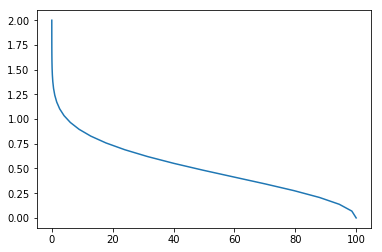

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt  
plt.plot(C_NH3, t)

## Problem 1C
The operator is worried that if the reaction continues to full extent the increase in the number of moles will drive the pressure too high.  Calculate the time it will take to achieve a 50% higher pressure in the reactor (assuming ideal gas) due to the increase in the number of moles, using fsolve.

[-0.48067563]


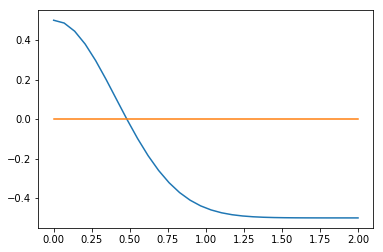

In [31]:
import numpy as np
from scipy.optimize import fsolve
dNg = (Alpha[0] + Alpha[1] + Alpha[2])/(-Alpha[0])

def f(t):
    p = 1.5 - 1 - (1 -np.exp(-3 * t*t))
    return p


plt.plot(t, f(t))
plt.plot(t,np.zeros(len(t)))
ans, d, flag, msg = fsolve(f, 2.0, full_output=1)
print(ans)



# Problem 2:  Stoichiometry of reaction systems (3 pt)

Consider the following set of chemical reactions:

\begin{equation*}
\ce{H2 + Br2 <=> 2HBr}\\
\ce{Br2 <=> 2Br}\\
\ce{Br + H2 <=> HBr + H}\\
\ce{H + Br2 <=> HBr + Br}\\
\ce{H + HBr <=> H2 + Br}\\
\ce{2Br <=> Br2}
\end{equation*}



## Determine the stoichiometric matrix $\nu$, the species list $A$ for this reaction system (in text)

Write A here: $[H_2, Br_2, HBr, Br, H]$

In [10]:
import numpy as np
nu = np.array([[-1,-1,2,0,0],[0,-1,0,2,0],[-1,0,1,-1,1],[0,-1,1,1,-1],[1,0,-1,1,-1],[0,1,0,-2,0]])
nu


array([[-1, -1,  2,  0,  0],
       [ 0, -1,  0,  2,  0],
       [-1,  0,  1, -1,  1],
       [ 0, -1,  1,  1, -1],
       [ 1,  0, -1,  1, -1],
       [ 0,  1,  0, -2,  0]])

## Determine the vector of molecular weights $MW$ and verify that all of the equations you have written obey mass balance

In [2]:
MW = np.array([2, 160, 81, 80, 1])
ans_matrix = nu * MW
ans = np.dot(nu, MW)
print(ans_matrix, ans)

[[  -2 -160  162    0    0]
 [   0 -160    0  160    0]
 [  -2    0   81  -80    1]
 [   0 -160   81   80   -1]
 [   2    0  -81   80   -1]
 [   0  160    0 -160    0]] [0 0 0 0 0 0]


## Determine the rank of the matrix using numpy or scipy. How many reactions are linearly independent?

In [9]:
from numpy.linalg import matrix_rank
ni = matrix_rank(nu)
print('The number of independent reactions "ni" are:', ni)

The number of independent reactions "ni" are: 3


## Now that you have found the number of independent reactions $n_i$, which $n_i$ of the original set of six reactions can be chosen as an independent set? Try guessing some set of $n_i$ reactions and determine the rank of the new stoichiometric matrix. Stop when you have determined successfully one or more sets of $n_i$ independent reactions.

$$$$ Reaction **1** is dependent on Reaction **4** and Reaction **3**
$$$$ Reaction **6** is dependent on Reaction **2** 
$$$$ Reaction **5** is dependent on Reaction **3** 
$$$$ Thus a matrix of **3** independent reactions can be made using Reactions **2, 3 and 4** as follows:

In [15]:
nu_2=nu[1:4]
nu_2

array([[ 0, -1,  0,  2,  0],
       [-1,  0,  1, -1,  1],
       [ 0, -1,  1,  1, -1]])

The new $\nu$ vector can be checked below as:

# How long did it take you to complete this assignment?

Approximately 6-7 hours (including debugging time)